# Named-Entity Recognition using SpaCy

## Remarks
- Some `PERSON` are labeled as `ORG`
- The combination of all the transcripts is too long to apply NER on it.
- 'J. Robert Oppenheimer', 'Oppenheimer', 'J. Robert Oppenheimer’s' are recognized as different entities.

## SpaCy's entity types
| Label | Description |
|-------|-------------|
| PERSON | People, including fictional. |
| NORP | Nationalities or religious or political groups. |
| FAC | Buildings, airports, highways, bridges, etc. |
| ORG | Companies, agencies, institutions, etc. |
| GPE | Countries, cities, states. |
| LOC | Non-GPE locations, mountain ranges, bodies of water. |
| PRODUCT | Objects, vehicles, foods, etc. (Not services.) |
| EVENT | Named hurricanes, battles, wars, sports events, etc. |
| WORK_OF_ART | Titles of books, songs, etc. |
| LAW | Named documents made into laws. |
| LANGUAGE | Any named language. |
| DATE | Absolute or relative dates or periods. |
| TIME | Times smaller than a day. |
| PERCENT | Percentage, including "%". |
| MONEY | Monetary values, including unit. |
| QUANTITY | Measurements, as of weight or distance. |
| ORDINAL | "first", "second", etc. |
| CARDINAL | Numerals that do not fall under another type. |

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy
from spacy import displacy
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [2]:
def extract_named_entities(text):
    """
    Extracts named entities from the given text (str) using spaCy and returns a pandas
    DataFrame with the names_entity, the label and the count of each named entity
    occurrence. 
    """
    doc = nlp(text)
    df = pd.DataFrame({'named_entity': [x.text for x in doc.ents],
                       'label': [x.label_ for x in doc.ents]})
    counts = df.groupby(['named_entity', 'label']).size().sort_values(ascending=False)
    df = counts.reset_index(name='count')
    return df

In [3]:
# Load data
data_folder = '../data/'
df = pd.read_csv(data_folder + 'scraped_data.csv')

## Biographies

In [4]:
# Combine all the biographies into one string
biographies = ' '.join(df['biography'].tolist())

# NER
biography_ne = extract_named_entities(biographies)
biography_ne.head(10)

,named_entity,label,count
0,the Manhattan Project,ORG,339
1,Los Alamos,GPE,316
2,Oak Ridge,GPE,192
3,Hanford,NORP,108
4,Oppenheimer,ORG,97
5,first,ORDINAL,81
6,Manhattan Project,ORG,74
7,Hanford,ORG,71
8,Hiroshima,GPE,66
9,DuPont,ORG,66


## Oppenheimer's Transcript

In [5]:
# NER of J. Robert Oppenheimer's interview transcript
# The combination of all the transcripts is too long to apply NER on it
transcript_ne = extract_named_entities(df['transcript'].iloc[411])
transcript_ne.head(10)

,named_entity,label,count
0,Groueff,PERSON,40
1,Los Alamos,GPE,12
2,first,ORDINAL,12
3,Chicago,GPE,10
4,Oppenheimer,ORG,10
5,one,CARDINAL,7
6,Lawrence,PERSON,5
7,Oak Ridge,GPE,5
8,Compton,ORG,3
9,Robert Wilson,PERSON,3


## Visualizations

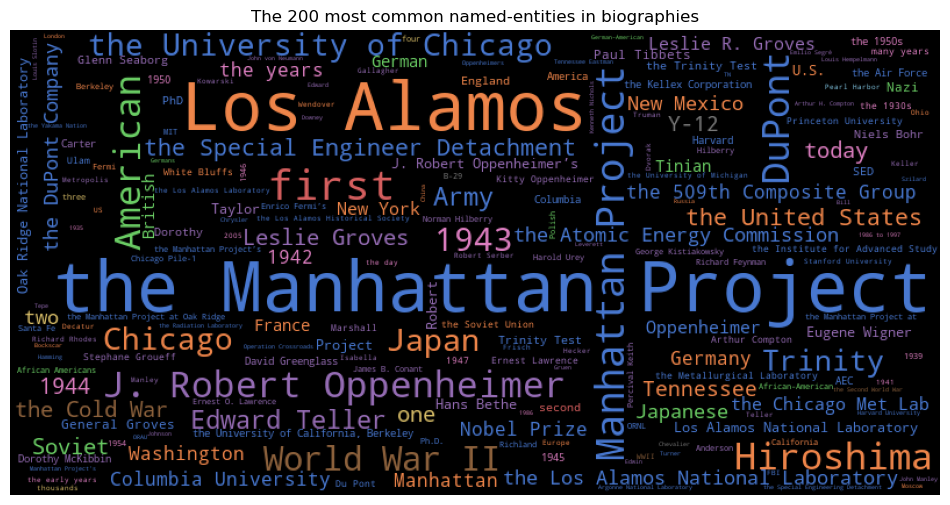

In [6]:
# Create a dictionary of named entities and their count
named_entities = dict(zip(biography_ne['named_entity'], biography_ne['count']))

# Create a dictionary to map each label to a color
palette = sns.color_palette('muted', len(biography_ne['label'].unique())).as_hex()
label_colors = dict(zip(biography_ne['label'].unique(), palette))

# Define the wordcloud object
wordcloud = WordCloud(background_color='black', width=800, height=400, max_words=200)
wordcloud.generate_from_frequencies(named_entities)

# Plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
# ax1.imshow(wordcloud.recolor(color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: label_colors.get(biography_ne[biography_ne['named_entity']==word]['label'].values[0], 'black')))
# ax1.set_title("The 200 most common named-entities in biographies")
# ax1.axis('off')

# handles = [plt.Rectangle((0,0),1,1, color=label_colors[label]) for label in label_colors]
# labels = list(label_colors.keys())
# ax2.legend(handles, labels, loc='center left')
# ax2.axis('off')

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud.recolor(color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: label_colors.get(biography_ne[biography_ne['named_entity']==word]['label'].values[0], 'black')))
plt.title("The 200 most common named-entities in biographies")
plt.axis('off')

plt.show()

In [7]:
displacy.render(nlp(df['transcript'].iloc[411]), jupyter=True, style='ent')